# 활성화 함수와 신경망 구현

## sigmoid 구현하기


In [2]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

sigmoid(4)

0.9820137900379085

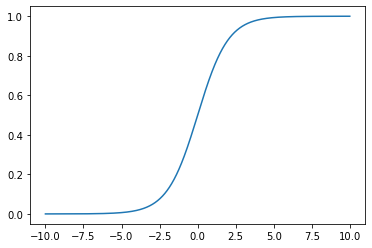

In [4]:
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.01)
y = sigmoid(x)
plt.plot(x, y)

## ReLU 함수

In [10]:
def relu(x):
    return np.maximum(0, x)

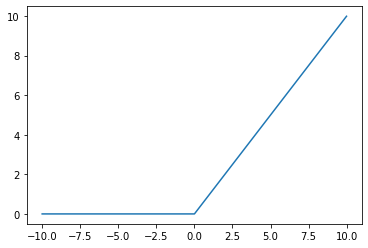

In [11]:
x = np.arange(-10, 10, 0.01)
y = relu(x)
plt.plot(x, y)

## 신경망 구현하기 연습 문제
Numpy를 사용하여 2개의 입력 노드와 1개의 출력 노드가 있는 간단한 네트워크의 출력을 Sigmoid 활성화 함수로 계산하는 코드를 구성하라
- 입력값은 [0.5, -0.3], 가중치는 [0.4, 0.6], 편향값은 -0.5
- ndarray의 곱셈은 np.dot으로 연산
- 시그모이드 함수를 구현 (Numpy의 지수 함수 np.exp를 사용)
- 네트워크 출력을 계산
- 최종 출력은 0.382252125230751이어야 함.



In [20]:
inputs = np.array([0.5, -0.3])
weights = np.array([0.4, 0.6])
bias = -0.5

y = sigmoid(np.dot(inputs, weights.T) + bias)
print(y)

0.382252125230751


다층 신경망도 구성해보자.

In [23]:
inputs = [1.0, 0.5] # 1x2 행렬
w1 = np.array([[0.1, 0.2, 0.3], [0.2, 0.3, 0.4]]) # 2x3 행렬
b1 = np.array([0.2, 0.3, 0.4]) # 3개 노드
w2 = np.array([[0.1, 0.2], [0.3, 0.2], [0.3, 0.4]]) # 3x2행렬
b2 = np.array([0.1, 0.2]) # 2개 노드
w3 = np.array([[0.1, 0.2], [0.3, 0.4]]) # 2x2행렬
b3 = np.array([0.1, 0.2]) # 2개 노드

# 신경망 구성 (포워딩)
l1_output = np.dot(inputs, w1) + b1
l1_y = sigmoid(l1_output)
l2_output = np.dot(l1_y, w2) + b2
l2_y = sigmoid(l2_output)
l3_output = np.dot(l2_y, w3) + b3
# 마지막 레이어에서는 경우에 따라서 다른 활성화 함수를 쓰거나 쓰지 않는 경우도 있음
l3_y = sigmoid(l3_output)
print(l3_y)

[0.59065816 0.64523766]


## 소프트 맥스 함수 구현하기

In [32]:
def origin_softmax(x):
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

x = np.array([1.3, 5.1, 2.2, 0.7, 1.1])
softmax_x = origin_softmax(x)
softmax_x

array([0.02019046, 0.90253769, 0.04966053, 0.01108076, 0.01653055])

In [33]:
np.sum(softmax_x) # 소프트맥스의 총 합은 0이다.

1.0

계산이 불가능한 숫자를 넣어보자.

In [34]:
x = np.array([10000, 10, 99999, 1, 2])
softmax_x = origin_softmax(x)
softmax_x

C:\Users\isc03\AppData\Local\Temp\ipykernel_9188\3339709200.py:2: RuntimeWarning: overflow encountered in exp
  f_x = np.exp(x) / np.sum(np.exp(x))
C:\Users\isc03\AppData\Local\Temp\ipykernel_9188\3339709200.py:2: RuntimeWarning: invalid value encountered in true_divide
  f_x = np.exp(x) / np.sum(np.exp(x))


array([nan,  0., nan,  0.,  0.])

따라서 소프트맥스에 입력되는 조금이라도 크면 연산이 불가능하다. 따라서 입력된 값을 일괄적으로 낮춰주는 작업이 필요하다.

In [31]:
def softmax(x):
    x = x - np.max(x) # x의 최대값을 모든 항에서 감산한다.
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

x = np.array([10000, 10, 99999, 1, 2])
softmax_x = softmax(x)
softmax_x

array([0., 0., 1., 0., 0.])